In [12]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


In [1]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
  Using cached statsmodels-0.14.2-cp39-cp39-win_amd64.whl.metadata (9.5 kB)
  Using cached pandas-2.2.2-cp39-cp39-win_amd64.whl.metadata (19 kB)
Using cached statsmodels-0.14.2-cp39-cp39-win_amd64.whl (9.9 MB)
Using cached pandas-2.2.2-cp39-cp39-win_amd64.whl (11.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
california = fetch_california_housing(as_frame=True)
df = california.frame

# Display the first few rows of the dataset
print(df.describe())


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

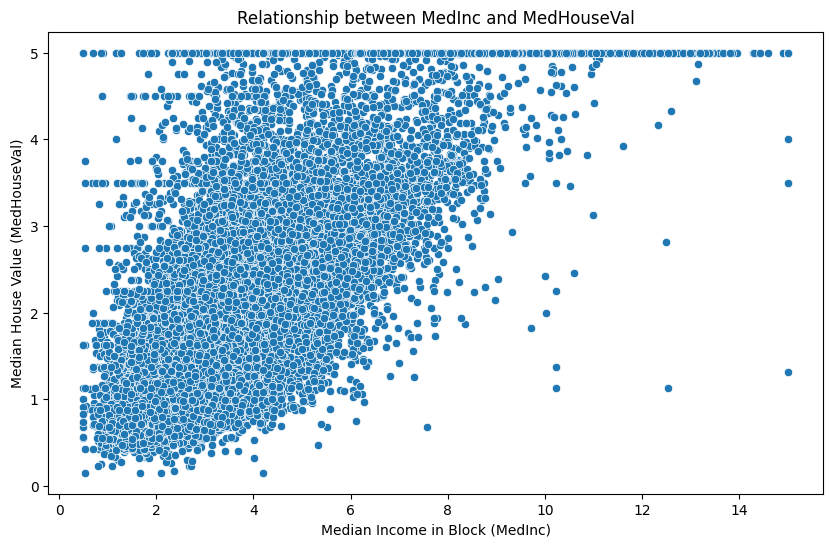

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the relationship between MedInc (median income in block) and MedHouseVal (median house value)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['MedInc'], y=df['MedHouseVal'])
plt.title('Relationship between MedInc and MedHouseVal')
plt.xlabel('Median Income in Block (MedInc)')
plt.ylabel('Median House Value (MedHouseVal)')
plt.show()


Mean Squared Error: 1.312416993593088
R-sqaured: -0.006489558238010673


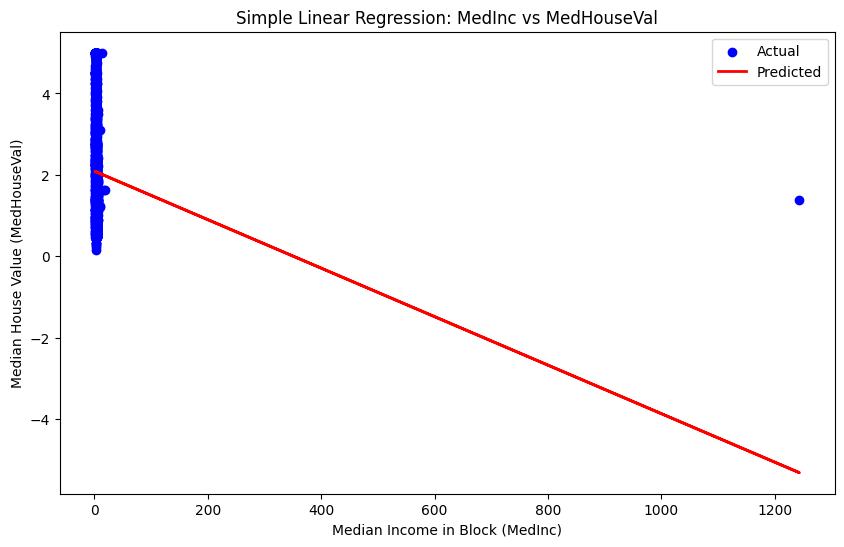

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# split data into training and test sets
X = df[['AveOccup']]
y = df[['MedHouseVal']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-sqaured: {r2}')

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Simple Linear Regression: MedInc vs MedHouseVal')
plt.xlabel('Median Income in Block (MedInc)')
plt.ylabel('Median House Value (MedHouseVal)')
plt.legend()
plt.show()

Mean Squared Error: 0.7214982234014606
R-sqaured: 0.4466846804895943


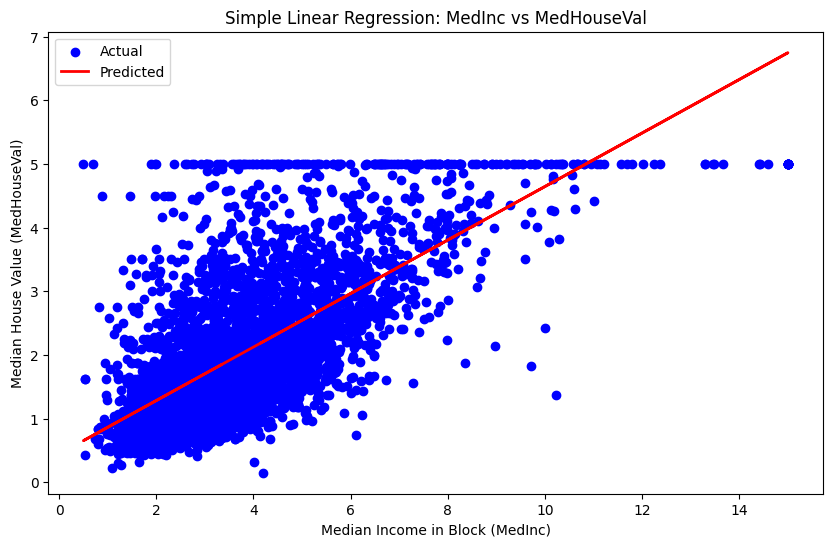

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# split data into training and test sets
X = df[['MedInc']]
y = df[['MedHouseVal']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-sqaured: {r2}')

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Simple Linear Regression: MedInc vs MedHouseVal')
plt.xlabel('Median Income in Block (MedInc)')
plt.ylabel('Median House Value (MedHouseVal)')
plt.legend()
plt.show()

In [7]:
# Select multiple features for the model
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']  # Example features
X = df[features]
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.6192780854178721
R-squared: 0.5250770679886769


In [8]:
# Select all features except the target variable 'MedHouseVal'
features = df.columns[:-1]  # All columns except the target variable
X = df[features]
y = df['MedHouseVal']
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Create a linear regression model
model = LinearRegression()

# Create the RFE model and select the best features
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)

# Print the selected features
selected_features = X.columns[rfe.support_]
print(f'Selected Features: {selected_features}')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Use the selected features for the model
X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

# Create and fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Selected Features: Index(['MedInc', 'Latitude', 'Longitude'], dtype='object')
Mean Squared Error: 0.564950919135654
R-squared: 0.5667404462127066


In [9]:
# Select all features except the target variable 'MedHouseVal'
features = df.columns[:-1]  # All columns except the target variable
X = df[features]
y = df['MedHouseVal']
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Decribe using numpy functions
# Count of elements
count = len(X_scaled)

# Mean
mean = np.mean(X_scaled)

# Standard deviation
std_dev = np.std(X_scaled)

# Minimum
minimum = np.min(X_scaled)

# Maximum
maximum = np.max(X_scaled)

# Quartiles
quartiles = np.percentile(X_scaled, [25, 50, 75])
q1, median, q3 = quartiles

# Display the results
print(f"Count: {count}")
print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Minimum: {minimum}")
print(f"Maximum: {maximum}")
print(f"25th Percentile (Q1): {q1}")
print(f"50th Percentile (Median): {median}")
print(f"75th Percentile (Q3): {q3}")




Count: 20640
Mean: -1.1890574657535784e-15
Standard Deviation: 0.9999999999999999
Minimum: -2.3859923416733877
Maximum: 119.41910318829312
25th Percentile (Q1): -0.5302528708080089
50th Percentile (Median): -0.06134647033531154
75th Percentile (Q3): 0.4075699436089951


In [10]:
# Determine multicollinearity (correlated linearly)
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeansvif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif_data)

      Feature       VIF
0      MedInc  2.501295
1    HouseAge  1.241254
2    AveRooms  8.342786
3   AveBedrms  6.994995
4  Population  1.138125
5    AveOccup  1.008324
6    Latitude  9.297624
7   Longitude  8.962263


In [23]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from geopy.distance import great_circle
from sklearn.cluster import KMeans

# Load the California Housing dataset
california = fetch_california_housing(as_frame=True)
df = california.frame

# Select features and target
features = df.columns[:-1]  # All columns except the target variable
X = df[features]
y = df['MedHouseVal']


In [25]:
# Standardize all features except longitude and latitude
scaler = StandardScaler()
features_to_scale = [col for col in features if col not in ['Longitude', 'Latitude']]
X_scaled = X.copy()
X_scaled[features_to_scale] = scaler.fit_transform(X[features_to_scale])

# Describe using numpy functions
mean_scaled = np.mean(X_scaled[features_to_scale], axis=0)
std_scaled = np.std(X_scaled[features_to_scale], axis=0)

print(f"Mean of standardized features: {mean_scaled}")
print(f"Standard deviation of standardized features: {std_scaled}")


Mean of standardized features: MedInc        6.609700e-17
HouseAge      5.508083e-18
AveRooms      6.609700e-17
AveBedrms    -1.060306e-16
Population   -1.101617e-17
AveOccup      3.442552e-18
dtype: float64
Standard deviation of standardized features: MedInc        1.0
HouseAge      1.0
AveRooms      1.0
AveBedrms     1.0
Population    1.0
AveOccup      1.0
dtype: float64


In [30]:
# Use KMeans clustering to create geographic regions
kmeans = KMeans(n_clusters=5, random_state=0)
X_scaled['Geo_Cluster'] = kmeans.fit_predict(X[['Longitude', 'Latitude']])

print(X_scaled.describe())


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04   
mean   6.609700e-17  5.508083e-18  6.609700e-17 -1.060306e-16 -1.101617e-17   
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   
min   -1.774299e+00 -2.196180e+00 -1.852319e+00 -1.610768e+00 -1.256123e+00   
25%   -6.881186e-01 -8.453931e-01 -3.994496e-01 -1.911716e-01 -5.638089e-01   
50%   -1.767951e-01  2.864572e-02 -8.078489e-02 -1.010650e-01 -2.291318e-01   
75%    4.593063e-01  6.643103e-01  2.519615e-01  6.015869e-03  2.644949e-01   
max    5.858286e+00  1.856182e+00  5.516324e+01  6.957171e+01  3.025033e+01   

           AveOccup      Latitude     Longitude   Geo_Cluster  
count  2.064000e+04  20640.000000  20640.000000  20640.000000  
mean   3.442552e-18     35.631861   -119.569704      1.651017  
std    1.000024e+00      2.135952      2.003532      0.955608  
min   -2.290000e-01     32.54000

C:\Users\elieberm1\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


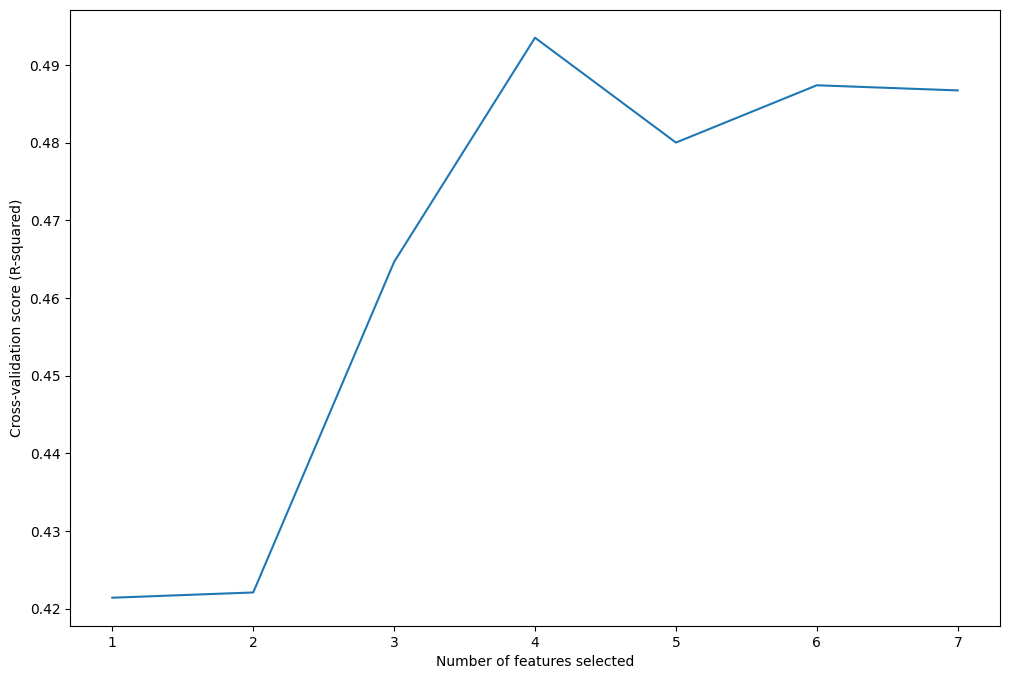

Selected Features: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms'], dtype='object')


In [33]:
# Prepare the final feature set
final_features = features_to_scale + ['Geo_Cluster']
X_final = X_scaled[final_features]

# Create a linear regression model
model = LinearRegression()

# Create the RFECV visualizer
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='r2')
rfecv.fit(X_final, y)

# Plot number of features vs. cross-validation scores
plt.figure(figsize=(12, 8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (R-squared)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

# Selected features from RFECV
selected_features = X_final.columns[rfecv.support_]
print(f'Selected Features: {selected_features}')


In [34]:

# Use the selected features for the model
X_selected = X_final[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

# Create and fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.6250727865829306
R-squared: 0.5206331250618381
